In [16]:
%pylab inline

import sys
import glob
import os.path as op
import shutil
# from matplotlib import pyplot as plt
import scipy.misc
# import skimage.transform
import skimage.io
import tesserocr
from PIL import Image
import re

Populating the interactive namespace from numpy and matplotlib


C:\Users\miros\Miniconda3\envs\scanpdf\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
path = r"C:/Users/miros/Dokumenty/Scanned Documents/Šumavan zima 2018" 

In [4]:
head, teil = op.split(path)
jpgs_path = op.join(head, teil + " - sorted")
fns = glob.glob(op.join(jpgs_path, "*"))

In [42]:
# im = skimage.io.imread(fns[0])
data = {}
for i, fn in enumerate(fns):
    im = Image.open(fn)
    w, h = im.size
    imcr = im.crop((0, 30, w, int(0.10 * h)))
    im.close()
    text = tesserocr.image_to_text(imcr)
    text = text.strip()
    text = re.sub('"', '', text)
    text = re.sub(r"['‘’?§;,>]", '', text)
    text = re.sub(r"\s+", ' ', text)
#     text = re.sub(r"^\s*\n", '', text)
    text = re.sub(' +', ' ', text)
#     text = re.sub(r'\n\s*\n', r'\n', text)
    text = re.sub(r'^\s*\d+[\s\d]*$', '', text)
    
    text = text.strip()
    if len(text) > 0:
        print(i + 1, ")", text)
        data[i+1] = text
# config = ("-l eng --oem 1 --psm 7")
# plt.imshow(imcr)

1 ) Pumdtce n1 yd: rod/cu (In mzmory ofmypdrmn} FIVE LENTEN MOTETS for Four- Fart Chorus of Mixed Voices : uppell:
5 ) “5 7_ ny- I I Kyrie ngolp (IZHCQ andugt) J 21.166 _0n0igémb ad lib. bi 5 12! s-J 1w
6 ) 1“ r—— !_ Pl—Jf H . | o 1 s 3 1 g s 5 f lci — son. 0 - 1c - -V i - snn. Ky ri _ c c _ Fai: —
7 ) Ave Maria Vytautas Miékinis *1954 komponien 10.12.1988
8 ) 11 cresc. poco a pace ctus fru—ctus ven - — tris tu - i
11 ) (M \I R DﬂTFTCT
27 ) 10 u
29 ) . r
30 ) I . I I 57 7 x-gd:uggg
31 ) Minet
34 ) 37 In.
35 ) Kaplanka
36 ) 10 2 Allegro molto (J = 144) i 0 PH —
37 ) Historicky tanec
39 ) 34 E 1311 2. sloce m. lL————_—H2.— 11
40 ) 12 Furiant
44 ) 16 46 Arm


In [45]:
import json
jsn = json.dumps(data, sort_keys=True, indent=4)#, separators=(',', ': '))
print(jsn)

{
    "1": "Pumdtce n1 yd: rod/cu (In mzmory ofmypdrmn} FIVE LENTEN MOTETS for Four- Fart Chorus of Mixed Voices : uppell:",
    "5": "\u201c5 7_ ny- I I Kyrie ngolp (IZHCQ andugt) J 21.166 _0n0ig\u00e9mb ad lib. bi 5 12! s-J 1w",
    "6": "1\u201c r\u2014\u2014 !_ Pl\u2014Jf H . | o 1 s 3 1 g s 5 f lci \u2014 son. 0 - 1c - -V i - snn. Ky ri _ c c _ Fai: \u2014",
    "7": "Ave Maria Vytautas Mi\u00e9kinis *1954 komponien 10.12.1988",
    "8": "11 cresc. poco a pace ctus fru\u2014ctus ven - \u2014 tris tu - i",
    "11": "(M \\I R D\ufb02TFTCT",
    "27": "10 u",
    "29": ". r",
    "30": "I . I I 57 7 x-gd:uggg",
    "31": "Minet",
    "34": "37 In.",
    "35": "Kaplanka",
    "36": "10 2 Allegro molto (J = 144) i 0 PH \u2014",
    "37": "Historicky tanec",
    "39": "34 E 1311 2. sloce m. lL\u2014\u2014\u2014\u2014_\u2014H2.\u2014 11",
    "40": "12 Furiant",
    "44": "16 46 Arm"
}


In [ ]:
import ruamel.yaml

In [18]:
tesserocr.get_languages()

('C:\\Users\\miros\\Miniconda3\\envs\\scanpdf\\tessdata/',
 ['eng', 'equ', 'osd'])

In [28]:
tesserocr.PSM.SINGLE_LINE

7

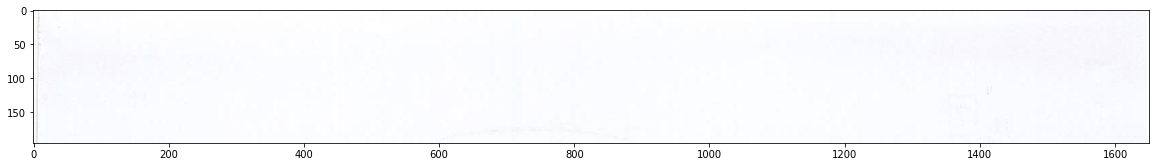

In [28]:
plt.figure(figsize=(20,18))
plt.imshow(imcr)